# [Задачи исследования](#stage_0_1)

# [Описание данных](#stage_0_2)


# [Часть 1. Приоритезация гипотез](#stage_1)


- Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета

---

- Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета

---

- Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло





# [Часть 2. Анализ A/B-теста](#stage_2)


## Проанализируйте A/B-тест:

1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения](#stage_2_1)

---

2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#stage_2_2)

---

3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения](#stage_2_3)

---

4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения](#stage_2_4)

---

5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения](#stage_2_5)

---

6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения](#stage_2_6)

---

7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей](#stage_2_7)

--- 

8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения](#stage_2_8)

---

9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов](#stage_2_9)

---

10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_10)

---

11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_11)

---

12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_12)

---

13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_13)

---

[Выводы](#stage_3)

<a name="stage_0_1"></a>

## Задачи исследования 

Приоритизировать гипотезы, запустить A/B-тест и проаналировать результаты.   

По результатам исследования предоставть рекомендацию на одно из действий:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

<a name="stage_0_2"></a>
## Описание данных

Файл `datasets/hypothesis.csv` — датасет, содержащий данные о гипотезах для проведения приоритизации  

`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  


Файл `/datasets/orders.csv` — датасет, содержащий данные о заказах  

`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

Файл `/datasets/visitors.csvx` — датасет, содержащий данные о пользователях  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

In [1]:
#Импортируем нужные библиотеки

import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# зададим размер графика
sns.set(rc={'figure.figsize':(9,5)})

#зададим полное отображение вывода
pd.options.display.max_colwidth = 120

In [3]:
# создадим функцию для проверки гипотезы о равенстве двух групп A и B с помощью критериям Манна-Уитни c округлением до трех знаков


def significanceFunc(dataA, dataB):
    alpha = 0.05
    p_value = st.mannwhitneyu(dataA, dataB)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
        
    print("Относительный прирост группы В к группе А: {0:.3%}".format(dataB.mean() / dataA.mean()-1))

In [4]:
# загрузим данные и преобразуем значения в столбцах

try:
    hypothesis = pd.read_csv('hypothesis.csv', sep=',')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

except FileNotFoundError:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
#приведем названия столбцов к строчному виду
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [7]:
hypothesis.duplicated().sum()

0

In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.duplicated().sum()

0

In [12]:
# изменим тип данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные подготовлены к дальнейшему анализу

## Часть 1. Приоритизация гипотез.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [15]:
hypothesis['ICE']= hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

hypothesis.sort_values('ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [16]:
hypothesis['RICE']= hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values('RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


  По результатам оценки согласно методике приоретизации RICE гипотезы изменили приоритет между собой. Лидерами стали гипотезы 7,2,0. Первое место заняла гипотеза №7 так как методика учитывет влияние на охват пользователей (reach)

топ 5 самых приоритетных гипотез составили № 0,2,6,8

<a name="stage_2"></a>

# Часть 2. Анализ A/B-теста

<a name="stage_2_1"></a>

### 2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

На основании проведенного А/В теста соберем соответствующий агрегированный датафрейм

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGr = orders[['date','group']].drop_duplicates()

datesGr.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [18]:
#Вычислим агрегированные кумулятивные по дням данные о заказах

ordersAgg = datesGr.apply(
                    lambda x:orders[
                                    np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group']
                                    )
                    ].agg({'date':'max','group':'max','transactionId':'nunique','visitorId':'nunique','revenue':'sum'}),
                    axis=1,
                    ).sort_values(by=['date','group'])

#Вычислим агрегированные кумулятивные по дням данные о посетителях

visitorsAgg = datesGr.apply(
                    lambda x:visitors[
                                    np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group']
                                    )
                    ].agg({'date':'max','group':'max','visitors':'sum'}),
                    axis=1,
                    ).sort_values(by=['date','group'])

#соберем данные в сводную таблицу и переименуем колонки в удобный вид

cumData = ordersAgg.merge(visitorsAgg, left_on=['date','group'],right_on=['date','group'])
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


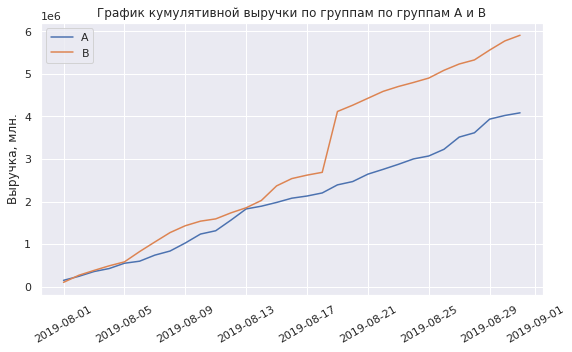

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumData[cumData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumData[cumData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend() 

Мы видим, что выручка растет равномерно увеличивается на протяжении всего теста.   
Однако графики выручки в группе В (17.08.2019) резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<a name="stage_2_2"></a>

### 2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

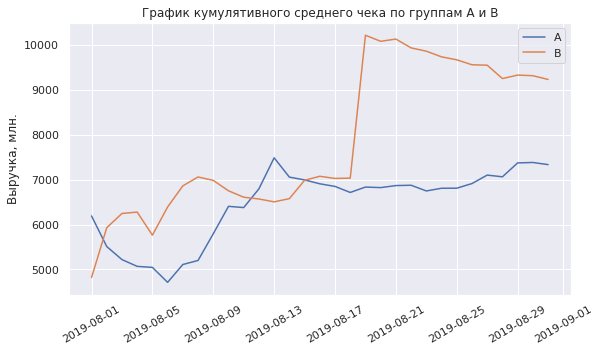

In [20]:
#Построим график среднего чека по группам 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам A и B')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend() 

На графике также видно, что в группе B резкий всплеск роста среднего чека после 17.08, что похоже на вборос данных. График по группе А стабилизировался

<a name="stage_2_3"></a>

### 2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [21]:
#соберем данные в один датафрейм
cumulativeRevenueAB = cumulativeRevenueA.merge(
                        cumulativeRevenueB,
                        left_on='date',
                        right_on='date',
                        how='left', 
                        suffixes=['_a', '_b']
)

cumulativeRevenueAB.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


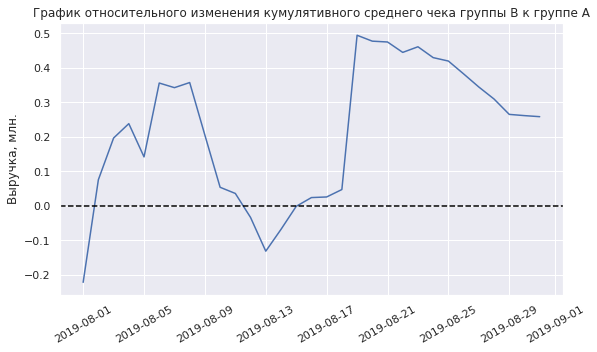

In [22]:
#построим график отношения средних чеков
plt.plot(cumulativeRevenueAB['date'],(
                                        cumulativeRevenueAB['revenue_b']/cumulativeRevenueAB['orders_b']
                                        )/(cumulativeRevenueAB['revenue_a']/cumulativeRevenueAB['orders_a']
                                          )-1
        )
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

На всех трех графиках мы видим схожую картину: после 17.08.2019 видим резкий всплеск при сохранении положительной динамики роста среднего количества заказов на посетителя по группам.

<a name="stage_2_4"></a>

### 2.4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

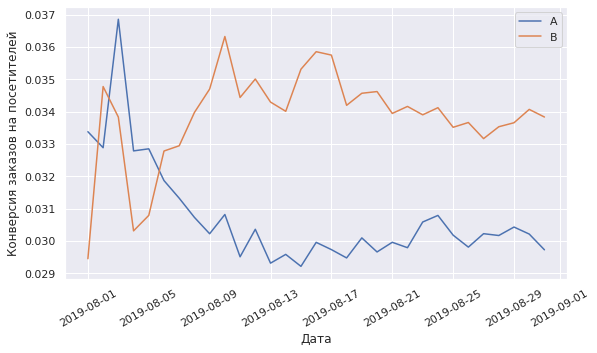

In [23]:
# считаем кумулятивную конверсию заказов на посетителей
cumData['conversion'] = cumData['orders']/cumData['visitors']

# отделяем данные по группе A
cumDataA = cumData[cumData['group']=='A']

# отделяем данные по группе B
cumDataB = cumData[cumData['group']=='B']

# строим графики
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.xlabel("Дата")
plt.ylabel("Конверсия заказов на посетителей")
plt.xticks(rotation=30)
plt.legend()

В обоих группах показатель кумулятивного среднего количества заказов на посетителя с момента начала исследования 
колебаются.
Отметим, что в группе В показатель выглядит более стабильным.

<a name="stage_2_5"></a>

### 2.5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

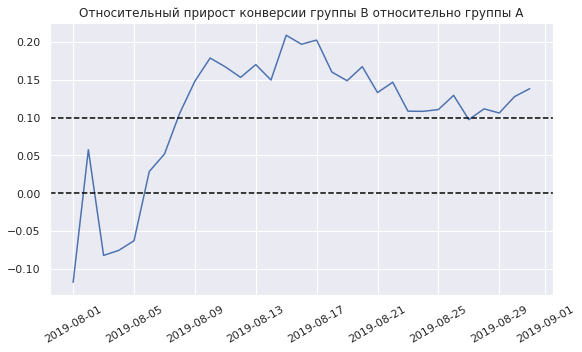

In [24]:
# соберем вспомогательный датафрейм и построим график относительного различия кумулятивных конверсий группы B к группе A
mergedcumData = cumDataA[['date','conversion']].merge(
    cumDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(mergedcumData['date'], 
         mergedcumData['conversionB']/
         mergedcumData['conversionA']-1
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='black', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. На протяжении почти всего теста число заказов группы B было выше более чем на 10%   
Мы видим, присогруппа В выглядит более привлекательной, но стоит проанализировать аномалии, возможно, они изменят картину. 

<a name="stage_2_6"></a>

### 2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

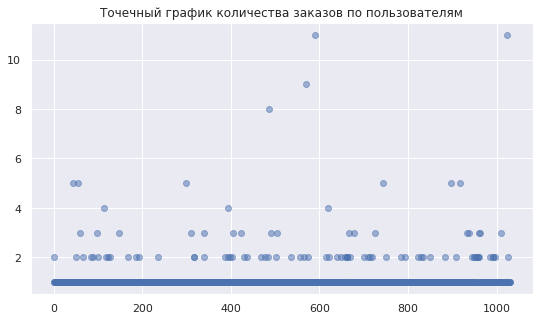

In [25]:
# соберем вспомогательный датафрейм и построим точечный график график
orders_by_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

x_values = pd.Series(range(0,len(orders_by_user['transactionId'])))
plt.scatter(x_values, orders_by_user['transactionId'], alpha=0.5) 
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Большинство пользователей делают по одному заказу, также есть много пользователей с 2-3 заказами. Однако пока рано говорить об исключении этих пользователей как выбросы.

<a name="stage_2_7"></a>

### 2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
#посчитаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_by_user['transactionId'], [95, 99])

array([2., 4.])

не более 1 % пользователей приходится 4 и более заказов.
Не более 5% пользователей совершают более 2 заказов.

можно сделать вывод, границу для определения аномальных пользователей - более 4х заказов.

<a name="stage_2_8"></a>

### 2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

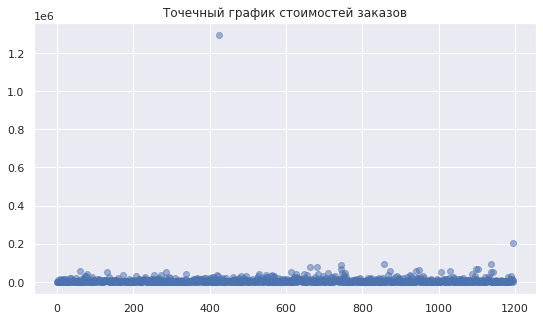

In [27]:
# построим точечный график стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.show()

На графике видны выбросы, которые повлияли на предыдущие графики

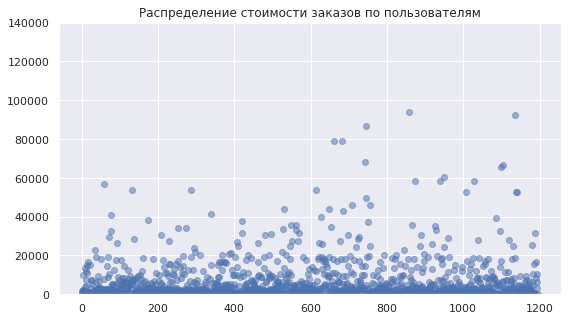

In [28]:
# строим дополнительную диаграмму
plt.ylim(0, 140000)
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Мы наблюдаем, что основное количество заказов находится в районе 20000

<a name="stage_2_9"></a>

### 2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Выберем границу для определения аномальных заказов по 99 перцентилю 58233

<a name="stage_2_10"></a>

### 2.10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сделайте выводы и предположения.

In [30]:
# Начнём с подготовки данных. 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# выведем получившуюся таблицу
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<p>Определим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в конверсии между группами нет}\\
   H_1 :\text{различия в конверсии между группами есть}
 \end{cases}
\end{equation*}$


In [31]:
# Разделим заказы по группам. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
  
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']



sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [32]:
# Сравним гипотезы с помощью критериям Манна-Уитни по сырым данным и выведем результат
significanceFunc(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост группы В к группе А: 13.808%


Вывод: По «сырым» данным наблюбается статистически значимая разница в среднем числе заказов групп A и B. P-value = 0.017 меньше 0.05. Значит, что нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост группы В к группе А составит 13.81%.

<a name="stage_2_11"></a>

### 2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<p>Определим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в значении среднего чека между группами нет}\\
   H_1 :\text{различия в значении среднего чека между группами есть}
 \end{cases}
\end{equation*}$


In [33]:
# выведем значения среднего чека в отдельные переменные по группам 
revenueA = orders[orders['group']=='A']['revenue']
revenueB = orders[orders['group']=='B']['revenue']

In [34]:
# сравним различия в среднем чеке между группами по сырым данным и выведем результат

significanceFunc(revenueA, revenueB)

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост группы В к группе А: 25.871%


Так как значение P-value 0.729 значительно выше 0.05,то нет оснований считать что в группах отличается значение среднего чека.

<a name="stage_2_12"></a>

### 2.12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

<p>Определим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в конверсии между группами нет}\\
   H_1 :\text{различия в конверсии между группами есть}
 \end{cases}
\end{equation*}$


 Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 58233 — users_with_expensive_orders. Объединим их в таблице abnormal_users.

In [35]:
# выделим пользователей с числом заказов больше 4 и пользователей, которые совершившили заказы дороже 58233 
#в отдельные переменные
    
tooManyOrders = np.percentile(orders_by_user['transactionId'], 99)
tooManyRevenue = np.percentile(orders['revenue'], 99)

# Сделаем срез 
      
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > tooManyOrders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > tooManyOrders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > tooManyRevenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [36]:
# выведем общее количество аномальных пользователей

abnormalUsers.shape[0]

15

In [37]:
#Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

sampleCleanA = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleCleanB = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
significanceFunc(sampleCleanA, sampleCleanB)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост группы В к группе А: 15.331%


Согласно "очищенным" данным разница в конверсии между группами есть.   
Относительный прирост группы В к группе А составил 15.33%

<a name="stage_2_13"></a>

### 2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

<p>Определим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в значении среднего чека между группами нет}\\
   H_1 :\text{различия в значении среднего чека между группами есть}
 \end{cases}
\end{equation*}$


In [39]:
#Посчитаем статистическую значимость различий в среднем чеке между группами теста по очищенным данным. 

significanceFunc(
    orders[(orders['group']=='A') & np.logical_not(orders['visitorId'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitorId'].isin(abnormalUsers))]['revenue']
                  )


P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост группы В к группе А: -0.575%


Так как значение P-value 0.851 значительно выше 0.05, то нет оснований считать что в группах отличается значение среднего чека. Относительное падение группы В к группе А составило 0.06%, что является несущественным.  

В сравнивнении с неочищенными данными P value вырос на 0,122 в то время как показатель среднего чека группы B среднего чека группы A снизился на 26,446 что является сильным изменением. Это говорит о том, что влияние выбросов приходится на группу В.

In [40]:
# сравним различия в среднем чеке между группами по сырым данным и выведем результат

significanceFunc(revenueA, revenueB)

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост группы В к группе А: 25.871%


Так как значение P-value 0.729 значительно выше 0.05,то нет оснований считать что в группах отличается значение среднего чека.

<a name="stage_3"></a>

# Выводы

В ходе исследования на основании данных, предоставленных интернет-магазином проведено исследование по результатам которого возможно предоставить следующие рекомендации: 

<b> 1) По результату приоритезации гипотез с целью увеличения выручки в первую очередь обратить внимание на гипотезы: </b> 

№8 "Запустить акцию, дающую скидку на товар в день рождения",  
№0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",  
№7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";

В том случае, если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то места необходимо распределить таким образом:

№7"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",  
№2"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",  
№0"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

<b> 2. В части анализа А/В теста: </b> 

График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты в группе В стабильно лучше данных в группе А;

Выявлено статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в группе А на 14-15%;

Отсутствует статистически значимое различие по среднему чеку между группами по «сырым» и по данным после очистки от выбросов данных;

На рост выручки вляют количество конверсия, средний чек и лучшие показатели получены в группе В;

По результатам проведенного исследования рекомендуется остановить тест зафиксировав победу группы B.